## Big Mart III
### Work In Progress

The data scientists at BigMart have collected 2013 sales data for 1559 products across 10 stores in different cities. Also, certain attributes of each product and store have been defined.<br>
The aim is **to build a predictive model and find out the sales of each product at a particular store.**

Using this model, BigMart will try `to understand the properties of products` and `stores which play a key role in increasing sales`.


Please note that the data may have missing values as some stores might not report all the data due to technical glitches. Hence, it will be required to treat them accordingly.

#### Data
We have train (8523) and test (5681) data set, train data set has both input and output variable(s). You need to predict the sales for test data set.

| Variable | Description
| :-------- | :-----------
| **Item_Identifier**| Unique product ID
| **Item_Weight** | Weight of product
| **Item_Fat_Content** | Whether the product is low fat or not
| **Item_Visibility** | The % of total display area of all products in a store allocated to the particular product
| **Item_Type** | The category to which the product belongs
| **Item_MRP** | Maximum Retail Price (list price) of the product
| **Outlet_Identifier** | Unique store ID
| **Outlet_Establishment_Year** | The year in which store was established
| **Outlet_Size** | The size of the store in terms of ground area covered
| **Outlet_Location_Type** | The type of city in which the store is located
| **Outlet_Type** | Whether the outlet is just a grocery store or some sort of supermarket
| **Item_Outlet_Sales** | Sales of the product in the particulat store. This is the outcome variable to be predicted.

#### Evaluation Metric:

Your model performance will be evaluated on the basis of your prediction of the sales for the test data (test.csv), which contains similar data-points as train except for the sales to be predicted. Your submission needs to be in the format as shown in "SampleSubmission.csv".

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### What does Train.csv file contain?

In [2]:
data = pd.read_csv("train.csv")
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [3]:
print(data.shape)

(8523, 12)


### Some statistics figures from this data.

In [4]:
data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


### How  should the submission look like?

In [5]:
sample = pd.read_csv("SampleSubmission.csv")
sample.head()

,Item_Identifier,Outlet_Identifier,Item_Outlet_Sales
0,FDW58,OUT049,0
1,FDW14,OUT017,0
2,NCN55,OUT010,0
3,FDQ58,OUT017,0
4,FDY38,OUT027,0


___

## Exploratory Data Analysis

#### Any missing value?

In [6]:
data.isnull().sum()/len(data)*100

Item_Identifier               0.000000
Item_Weight                  17.165317
Item_Fat_Content              0.000000
Item_Visibility               0.000000
Item_Type                     0.000000
Item_MRP                      0.000000
Outlet_Identifier             0.000000
Outlet_Establishment_Year     0.000000
Outlet_Size                  28.276428
Outlet_Location_Type          0.000000
Outlet_Type                   0.000000
Item_Outlet_Sales             0.000000
dtype: float64

Yes, 17% of `Item_weigh` are missing and 28% of `Outlet_Size` are missing.

#### Replace missing value.

In [7]:
data['Item_Weight'].fillna(data['Item_Weight'].median(), inplace=True)
data['Outlet_Size'].fillna(data['Outlet_Size'].mode()[0], inplace=True)

#### Ckecking of any missing value.

In [8]:
data.isnull().sum()/len(data)*100

Item_Identifier              0.0
Item_Weight                  0.0
Item_Fat_Content             0.0
Item_Visibility              0.0
Item_Type                    0.0
Item_MRP                     0.0
Outlet_Identifier            0.0
Outlet_Establishment_Year    0.0
Outlet_Size                  0.0
Outlet_Location_Type         0.0
Outlet_Type                  0.0
Item_Outlet_Sales            0.0
dtype: float64

#### Ok, Missing/Replacing values step is Done!  Then, a little check about the variance within this dataset.

In [9]:
data.var()

Item_Weight                  1.786956e+01
Item_Visibility              2.662335e-03
Item_MRP                     3.878184e+03
Outlet_Establishment_Year    7.008637e+01
Item_Outlet_Sales            2.912141e+06
dtype: float64

All variances are ok, except the `Item_Visibility` which have 0.00266 variance. Thus, the item doesn't have any impact. Then, it will be drop from the analysis.

In [10]:
# remove'Item_Visibility' item.

new_data = data.drop(['Item_Visibility'], axis=1)

#### Having a look on distribution of numeric items and correlation between them.

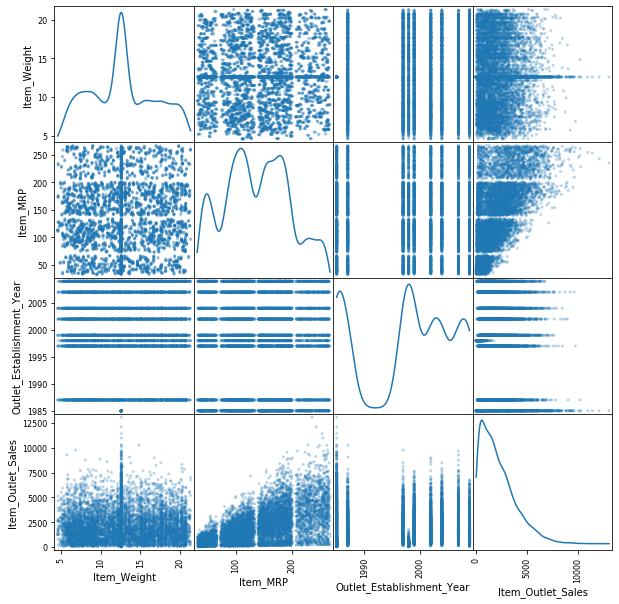

In [11]:
from pandas.plotting import scatter_matrix

scatter_matrix(new_data, alpha = 0.3, figsize = (10,10), diagonal = 'kde');

Based on "Item_Outlet_Sales" fluctuation,
+ "Item_MRP" *(Maximum Retail Price (list price) of the product))* looks like to have changing density regarding level of sales;
+ The year at which the store has been established provides light indications (see "Outlet_Establishment_Year"). It might bring some granularity information later on.

In [12]:
new_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [13]:
print(new_data.shape)

(8523, 11)


___

## Data Processing

#### Generate two dataset: 'sales_raw' with the target sales, 'features_raw' with the features as inputs.

In [14]:
sales_raw = new_data['Item_Outlet_Sales']
features_raw = new_data.drop('Item_Outlet_Sales', axis = 1)

In [15]:
print(features_raw.shape)

(8523, 10)


#### Normalization of data (features)

In [16]:
import warnings
warnings.filterwarnings('always')

# Normalizing Numerical features
from sklearn.preprocessing import MinMaxScaler

# initialize a scaler, apply it to features_raw
scaler = MinMaxScaler() # default=(0,1)
numerical = ['Item_Weight', 'Item_MRP', 'Outlet_Establishment_Year']

features_rawminmax = pd.DataFrame(data = features_raw)
features_rawminmax[numerical] = scaler.fit_transform(features_raw[numerical])

/Users/mikehatchi/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [17]:
features_rawminmax.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDA15,0.282525,Low Fat,Dairy,0.927507,OUT049,0.583333,Medium,Tier 1,Supermarket Type1
1,DRC01,0.081274,Regular,Soft Drinks,0.072068,OUT018,1.000000,Medium,Tier 3,Supermarket Type2
2,FDN15,0.770765,Low Fat,Meat,0.468288,OUT049,0.583333,Medium,Tier 1,Supermarket Type1
3,FDX07,0.871986,Regular,Fruits and Vegetables,0.640093,OUT010,0.541667,Medium,Tier 3,Grocery Store
4,NCD19,0.260494,Low Fat,Household,0.095805,OUT013,0.083333,High,Tier 3,Supermarket Type1


In [18]:
item_id = features_rawminmax['Item_Identifier']
outlet_id = features_rawminmax['Outlet_Identifier']
features_wo_id = features_rawminmax.drop(['Item_Identifier', 'Outlet_Identifier'], axis=1 )

#### None-numerical data

In [19]:
features_final = pd.get_dummies(features_wo_id)

In [20]:
print(item_id.shape, outlet_id.shape, features_final.shape)

(8523,) (8523,) (8523, 34)


<blockquote> alternative: creation of binary data (via get_dummies) for non-numerical items, except items  and outlet id's</blockquote>

```python
none_dummy_cols = ['Item_Identifier', 'Outlet_Identifier']

dummy_cols = list(set(features_rawminmax.columns) - set(none_dummy_cols))
features_final = pd.get_dummies(features_rawminmax, columns = dummy_cols)
```

In [21]:
features_final.head()

,Item_Weight,Item_MRP,Outlet_Establishment_Year,Item_Fat_Content_LF,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Fat_Content_low fat,Item_Fat_Content_reg,Item_Type_Baking Goods,Item_Type_Breads,...,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,0.282525,0.927507,0.583333,0,1,0,0,0,0,0,...,0,1,0,1,0,0,0,1,0,0
1,0.081274,0.072068,1.000000,0,0,1,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0
2,0.770765,0.468288,0.583333,0,1,0,0,0,0,0,...,0,1,0,1,0,0,0,1,0,0
3,0.871986,0.640093,0.541667,0,0,1,0,0,0,0,...,0,1,0,0,0,1,1,0,0,0
4,0.260494,0.095805,0.083333,0,1,0,0,0,0,0,...,1,0,0,0,0,1,0,1,0,0


#### Overview of variance of the entire items, then.

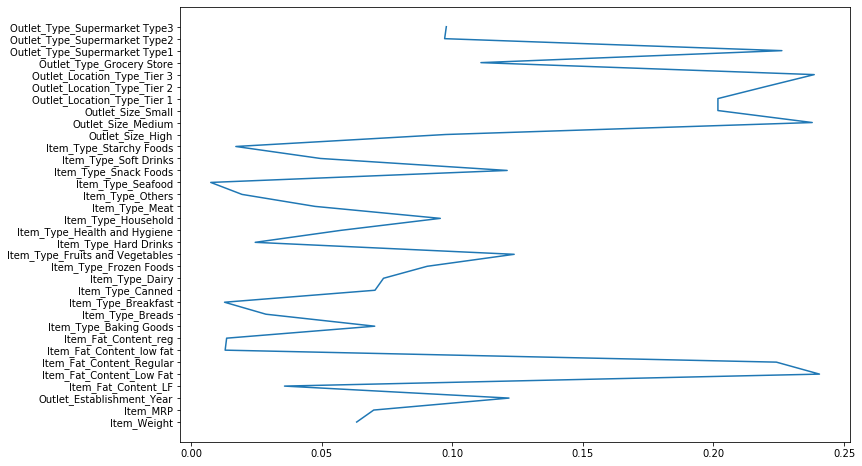

In [22]:
var = []
colname = []
plt.figure(figsize=(12,8))
for n, v in zip(features_final.columns, features_final.var()):
    var.append(v)
    colname.append(str(n))

plt.plot(var, colname)
plt.show()

**Then, we can notice 5 high variance peaks. Which lead us to look at up to 5 principal components.**<br>
The underlying work here, is to find the compound of combinations of features that explained sales fluctuations.

In [23]:
from sklearn.decomposition import PCA

for n in range(2, 6):
    pca = PCA(n_components=n)
    pca.fit(features_final)

    # print(pca.components_)
    print("Variance explained for {} components:".format(n), pca.explained_variance_)

Variance explained for 2 components: [0.65355138 0.46000458]
Variance explained for 3 components: [0.65355138 0.46000458 0.45027728]
Variance explained for 4 components: [0.65355138 0.46000457 0.45027728 0.26950573]
Variance explained for 5 components: [0.65355138 0.46000457 0.45027714 0.26950653 0.1906998 ]


___

## Implementation

**Let's keep 5 components!**

In [24]:
pca = PCA(n_components=5)
pca.fit(features_final)

# transform features_final using the PCA fit above
reduced_fl = pca.transform(features_final)
# print(reduced_fl)

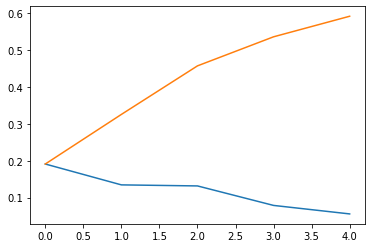

In [25]:
plt.plot(range(5), pca.explained_variance_ratio_)
plt.plot(range(5), np.cumsum(pca.explained_variance_ratio_))

**60% of variance is using 5 components.**

In [26]:
reduced_fldata = pd.DataFrame(reduced_fl, columns =['Dimension 1','Dimension 2','Dimension 3','Dimension 4','Dimension 5'])
reduced_fldata.head()

,Dimension 1,Dimension 2,Dimension 3,Dimension 4,Dimension 5
0,-0.289444,-0.101775,-0.493692,-0.517986,0.905064
1,1.122831,-0.101377,0.857465,-0.314577,-0.363102
2,-0.281430,-0.098439,-0.470325,-0.522574,0.902703
3,1.050276,0.357613,0.876299,-0.310471,-0.300049
4,0.264844,0.372747,-0.754468,1.286961,0.280713


In [30]:
print(sales_raw.shape, reduced_fldata.shape)

(8523,) (8523, 5)


In [28]:
sales_target = pd.DataFrame(sales_raw, columns =['Sales'])
sales_target.head()

,Sales


In [31]:
reducfl_sales = pd.concat([reduced_fldata, sales_target[['Sales']]], axis=1)
reducfl_sales.head()

,Dimension 1,Dimension 2,Dimension 3,Dimension 4,Dimension 5,Sales
0,-0.289444,-0.101775,-0.493692,-0.517986,0.905064,NaN
1,1.122831,-0.101377,0.857465,-0.314577,-0.363102,NaN
2,-0.281430,-0.098439,-0.470325,-0.522574,0.902703,NaN
3,1.050276,0.357613,0.876299,-0.310471,-0.300049,NaN
4,0.264844,0.372747,-0.754468,1.286961,0.280713,NaN
